<a href="https://colab.research.google.com/github/ayu1521/Prediction-Online-Learning-Completion/blob/main/MSE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving online_learning.csv to online_learning.csv
📄 First few rows of the dataset:


,videos_watched,assignments_submitted,forum_posts,completed
0,11,6,5,yes
1,43,1,11,no
2,37,1,8,no
3,18,4,14,yes
4,6,4,15,yes



✅ Accuracy: 0.35
✅ Precision: 0.50
✅ Recall: 0.31

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.43      0.32         7
           1       0.50      0.31      0.38        13

    accuracy                           0.35        20
   macro avg       0.38      0.37      0.35        20
weighted avg       0.41      0.35      0.36        20



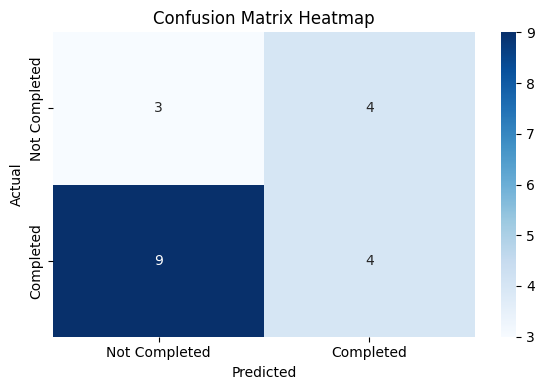

In [3]:
# For manual file upload in Jupyter Notebook or Google Colab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload file
from IPython.display import display
from google.colab import files  # Only for Colab — comment out if using Jupyter
uploaded = files.upload()

# Automatically get the uploaded filename
filename = next(iter(uploaded))

# Read the uploaded file
df = pd.read_csv(filename)
print("📄 First few rows of the dataset:")
display(df.head())

# Encode target column
df['completed'] = df['completed'].map({'yes': 1, 'no': 0})

# Features and target
X = df[['videos_watched', 'assignments_submitted', 'forum_posts']]
y = df['completed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print metrics
print(f"\n✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()
